# A5

Data Types and First Few Rows:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          obj

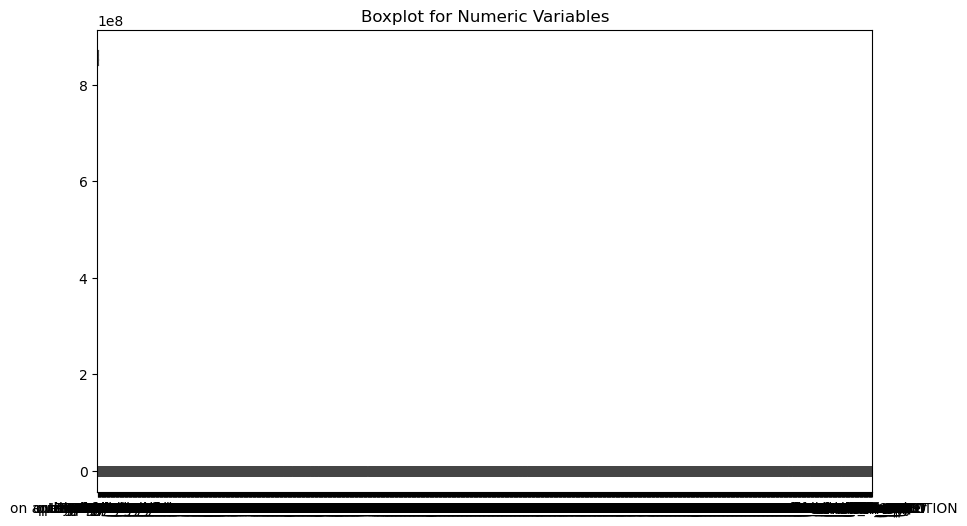

Mean of Numeric Variables:
 Record ID                    8.529473e+08
age                          7.355582e+01
on thyroxine                 1.351941e-01
query on thyroxine           1.668120e-02
on antithyroid medication    1.264719e-02
                                 ...     
Condition_OI                 1.090275e-04
Condition_P                  5.451374e-04
Condition_Q                  1.526385e-03
Condition_R                  2.136939e-02
Condition_S                  9.267335e-03
Length: 1375, dtype: float64
Variance of Numeric Variables:
 Record ID                    5.748625e+13
age                          1.401801e+06
on thyroxine                 1.169294e-01
query on thyroxine           1.640473e-02
on antithyroid medication    1.248860e-02
                                 ...     
Condition_OI                 1.090275e-04
Condition_P                  5.448996e-04
Condition_Q                  1.524221e-03
Condition_R                  2.091501e-02
Condition_S                  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"  # Replace with the correct path
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

print("Data Types and First Few Rows:\n", df.dtypes, df.head())

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for col in categorical_columns:
    if df[col].nunique() == 2:  # Ordinal Example
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:  # Nominal Example
        df = pd.get_dummies(df, columns=[col])

numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Numeric Data Range:\n", df[numeric_columns].describe())


missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot for Numeric Variables")
plt.show()

means = df[numeric_columns].mean()
variances = df[numeric_columns].var()  
print("Mean of Numeric Variables:\n", means)
print("Variance of Numeric Variables:\n", variances)


# A6

In [7]:
import pandas as pd
import numpy as np


file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


for col in numeric_columns:
    if df[col].isnull().sum() > 0:  
        if df[col].skew() < 1:  
            df[col].fillna(df[col].mean(), inplace=True)
            print(f"Imputed missing values in {col} with mean: {df[col].mean()}")
        else: 
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Imputed missing values in {col} with median: {df[col].median()}")

for col in categorical_columns:
    if df[col].isnull().sum() > 0:  
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Imputed missing values in {col} with mode: {df[col].mode()[0]}")

print("\nData after imputation:\n", df.head())
print("\nMissing Values after imputation:\n", df.isnull().sum())


Missing Values:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64

Data aft

# A7

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

file_path =  "C:/Users/year3/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

numeric_columns = df.select_dtypes(include=[np.number]).columns

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


df_min_max_scaled = df.copy()
df_min_max_scaled[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

df_standard_scaled = df.copy()
df_standard_scaled[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

df_robust_scaled = df.copy()
df_robust_scaled[numeric_columns] = robust_scaler.fit_transform(df[numeric_columns])

print("Original Data:\n", df[numeric_columns].head())
print("\nMin-Max Scaled Data:\n", df_min_max_scaled[numeric_columns].head())
print("\nStandard Scaled Data:\n", df_standard_scaled[numeric_columns].head())
print("\nRobust Scaled Data:\n", df_robust_scaled[numeric_columns].head())


Original Data:
    Record ID  age
0  840801013   29
1  840801014   29
2  840801042   41
3  840803046   36
4  840803047   32

Min-Max Scaled Data:
       Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473

Standard Scaled Data:
    Record ID       age
0  -1.602090 -0.037634
1  -1.602090 -0.037634
2  -1.602086 -0.027499
3  -1.601822 -0.031722
4  -1.601822 -0.035100

Robust Scaled Data:
    Record ID       age
0  -0.990390 -0.838710
1  -0.990390 -0.838710
2  -0.990388 -0.451613
3  -0.990193 -0.612903
4  -0.990193 -0.741935


# A8

In [9]:
import numpy as np

vector1 = np.array([1, 0, 1, 1, 0, 1])
vector2 = np.array([1, 1, 0, 1, 0, 1])

f11 = np.sum((vector1 == 1) & (vector2 == 1))
f00 = np.sum((vector1 == 0) & (vector2 == 0))
f01 = np.sum((vector1 == 0) & (vector2 == 1))
f10 = np.sum((vector1 == 1) & (vector2 == 0))

jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"f11 = {f11}, f00 = {f00}, f01 = {f01}, f10 = {f10}")
print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")


f11 = 3, f00 = 1, f01 = 1, f10 = 1
Jaccard Coefficient (JC): 0.6
Simple Matching Coefficient (SMC): 0.6666666666666666
